<a href="https://colab.research.google.com/github/YChen1212/Banking-Customer-Churn-Analysis/blob/main/Banking_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **銀行顧客流失分析**



# 1. 讀取資料 & 資料初步了解

In [ ]:
# 匯入套件
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from google.colab import drive

In [ ]:
# 讀取資料
drive.mount('/content/drive')
file = '/content/drive/MyDrive/python練習/Churn_Modelling.csv'
df = pd.read_csv(file)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# 檢視各欄位之資料型態以及非空值數量
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 2. EDA & 商業洞察

In [ ]:
# 計算流失比例
exited_count = df.Exited.value_counts()
total_exit_count = df.Exited.count()
exited_1_count = (df['Exited']==1).sum()
churn_per = (exited_1_count/total_exit_count)
print('Customer Churn Rate: '+str(round((churn_per*100),2))+'%')

Customer Churn Rate: 20.37%


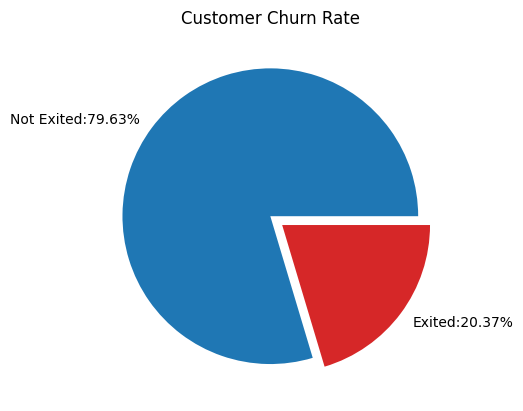

In [ ]:
# 繪製流失比例圓餅圖
exited_labels = ['Not Exited', 'Exited']
combine_label = [f"{label}:{count/total_exit_count:.2%}" for label, count in zip(exited_labels, exited_count)]
plt.pie(x=exited_count, labels=combine_label, explode=(0, 0.1), colors=['#1f77b4', '#d62728'])
plt.title('Customer Churn Rate')
plt.show()
# 商業洞察：整體流失率約20%，比例偏高，顯示客戶留存是銀行需解決之關鍵問題。


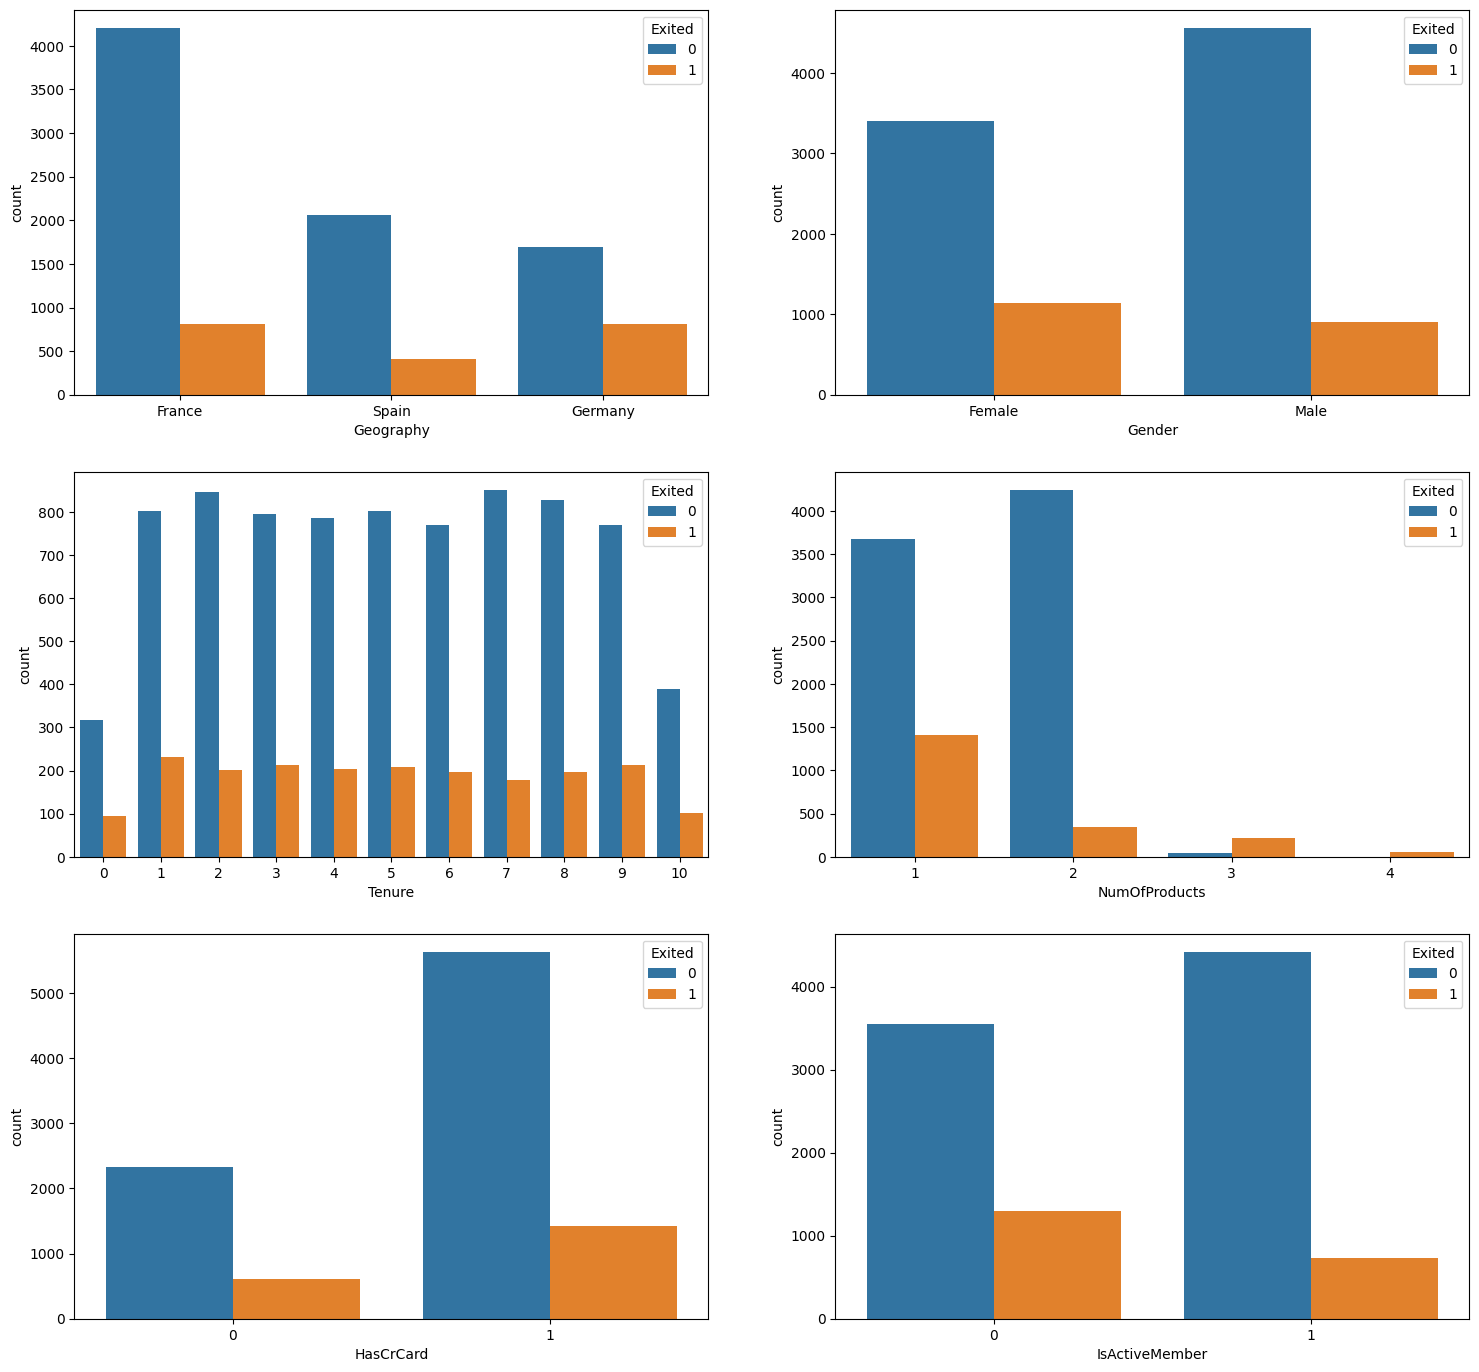

In [ ]:
# 分類變數與流失關係
fig, axes = plt.subplots(3, 2, figsize=(18,17))
sns.countplot(data=df, x ='Geography', hue='Exited', ax=axes[0][0])
# 商業洞察：德國客戶流失率明顯高於法國及西班牙，可能有地區性之服務或競爭問題。
sns.countplot(data=df, x='Gender', hue='Exited', ax=axes[0][1])
# 商業洞察：女性之流失率高男性，可能係現有產品或服務流程未能滿足女性需求。
sns.countplot(data=df, x='Tenure', hue='Exited', ax=axes[1][0])
# 商業洞察：新顧客(未滿1年)以及使用時長最久之客戶(10年)不論是未流失或以流失的數量皆相較少，使用年數為1~9年之顧客，流失情況平均，未見顯著影響。
sns.countplot(data=df, x='NumOfProducts', hue='Exited', ax=axes[1][1])
# 商業洞察：大多數流失顧客集中在擁有1個產品之類別，也因總數量最多，是需要重點關注的群體。擁有3項或4項產品之顧客數量明顯稀少，可能是產品組合過於複雜，或是缺乏相應的銷售或服務策略。
sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=axes[2][0])
# 商業洞察：是否持有信用卡這個要素對於流失未見顯著影響。
sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=axes[2][1])
# 商業洞察：不活躍的顧客流失數量相較於活躍顧客多，與顧客行為特徵一致。
plt.show()

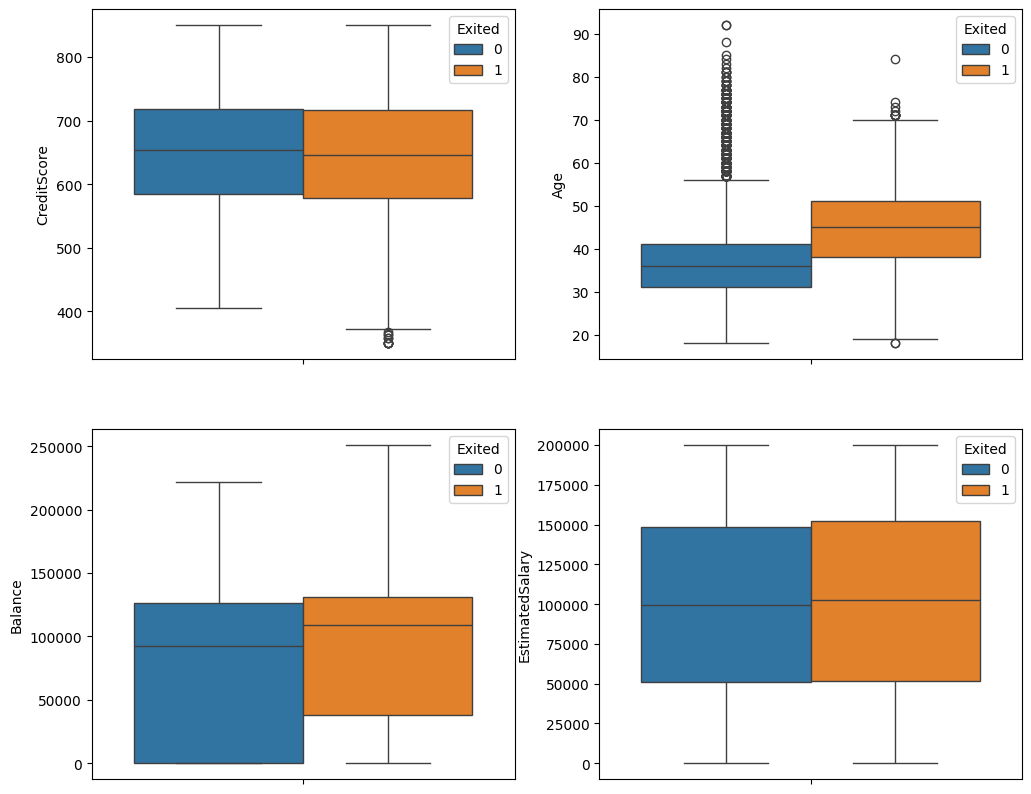

In [ ]:
# 數值變數與流失關係
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=df, y='CreditScore', hue='Exited', ax=axes[0][0])
# 商業洞察：整體而言，信用分數在流失與未流失的客戶群體中未有顯著差異，但流失群體中有數個信用分數低於400分的離群值，可能係因無法得到滿意的貸款服務。
sns.boxplot(data=df, y='Age', hue='Exited', ax=axes[0][1])
# 商業洞察：顧客流失率隨著年齡增長而上升。特別是40-60歲的中年客戶，其流失率最高，這些中年客戶處於資產累積高峰期，係銀行主要資產貢獻者，其高流失率可能暗示銀行未能提供符合其需求之高階服務。
sns.boxplot(data=df, y='Balance', hue='Exited', ax=axes[1][0])
# 商業洞察：有餘額之顧客流失率高於較低餘額、零餘額之顧客，可能暗示著高資產客戶之維護需要改善。
sns.boxplot(data=df, y='EstimatedSalary', hue='Exited', ax=axes[1][1])
# 商業洞察：預估薪資之多寡與流失未有顯著關係。
plt.show()

<Axes: >

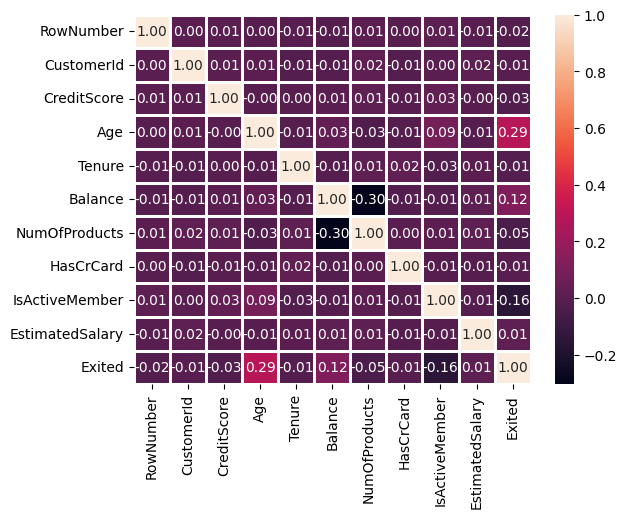

In [ ]:
# 相關係數熱圖
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), linewidths = 1, annot = True, fmt = ".2f")
# 商業洞察：與其他變數相比，年齡與帳戶餘額與顧客流失呈較強的正相關；相較其他變數，顧客活躍程度與流失呈現較顯著的負相關。

# 3. 特徵工程 & 模型訓練

In [ ]:
# 匯入套件
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


In [ ]:
# 移除不必要的欄位
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [ ]:
# 定義數值與類別型特徵
number_x = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
category_x = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [ ]:
# 特徵資料預處理
# Pipeline: 數值標準化 ；類別：One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num_x', StandardScaler(), number_x),
        ('cat_x', OneHotEncoder(drop='first'), category_x)
        ])
# 數值型使用StandardScaler進行標準化；類別型使用OneHotEncoder編碼，並排除第一項以避免多重共線性

In [ ]:
# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # random_state暫定為1

In [ ]:
# 定義模型
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=1),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train), use_label_encoder=False, eval_metric="logloss", random_state=1)
}
# 因流失客戶相較於未流失客戶少，資料不平衡，故給予流失客戶較高權重，以改善模型

In [ ]:
# 訓練並評估各模型
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n=== {name} 模型評估報告 ===")
    print("混淆矩陣:\n", confusion_matrix(y_test, y_pred))
    print("分類報告:\n", classification_report(y_test, y_pred))


=== Logistic Regression 模型評估報告 ===
混淆矩陣:
 [[1166  419]
 [ 126  289]]
分類報告:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1585
           1       0.41      0.70      0.51       415

    accuracy                           0.73      2000
   macro avg       0.66      0.72      0.66      2000
weighted avg       0.80      0.73      0.75      2000


=== Random Forest 模型評估報告 ===
混淆矩陣:
 [[1541   44]
 [ 224  191]]
分類報告:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.81      0.46      0.59       415

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:32:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost 模型評估報告 ===
混淆矩陣:
 [[1398  187]
 [ 150  265]]
分類報告:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1585
           1       0.59      0.64      0.61       415

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.83      2000

